# CAMPO MAGNETICO SU DISTANZA

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [88]:
def chi_quadro(funzione, popt, x, y, yerr):
    y_fit = funzione(x, *popt)  # Calcola i valori della funzione di fit
    chi2 = np.sum(((y - y_fit) / yerr) ** 2)  # Formula del chi quadro
    dof = len(x) - len(popt)  # Gradi di libertà
    return chi2 / dof  # Chi quadro ridotto

In [89]:
def reciproco_cubo(x, a, delta_x, q):
    cubo_binomio = x*x*x + 3*x*x*delta_x + 3*x*delta_x*delta_x + delta_x*delta_x*delta_x
    return a/cubo_binomio + q

In [90]:
def due_reciproci_cubi(x, a1, delta_x1, a2, delta_x2, q):
    cubo1 = (x+delta_x1)**3
    cubo2 = (x+delta_x2)**3
    return a1/cubo1 + a2/cubo2 + q

In [91]:
def esponente_libero(x, n, a, delta_x, q):
    esponente = min(n,20)
    den = (x+delta_x)**esponente
    return a/den + q

In [92]:
# Funzione per propagare l'errore
def propagate_error(x, func, popt, param_errors):
    partials = []
    delta = 1e-6  # Piccola variazione per il calcolo numerico delle derivate
    for i in range(len(popt)):
        popt_up = popt.copy()
        popt_down = popt.copy()
        popt_up[i] += delta
        popt_down[i] -= delta
        partial_derivative = (func(x, *popt_up) - func(x, *popt_down)) / (2 * delta)
        partials.append(partial_derivative)
    partials = np.array(partials)
    error = np.sqrt(np.sum((partials * param_errors) ** 2))
    return error

In [93]:
# quella di erika
def altra (x, n, B0, x0):
    denom = 1 + (x/x0) ** n
    return B0 / denom

## Magnete grande

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_19307/3434090122.py:3: RuntimeWarning: invalid value encountered in power
  den = (x+delta_x)**esponente
/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_19307/1063926449.py:3: RuntimeWarning: divide by zero encountered in divide
  denom = 1 + (x/x0) ** n


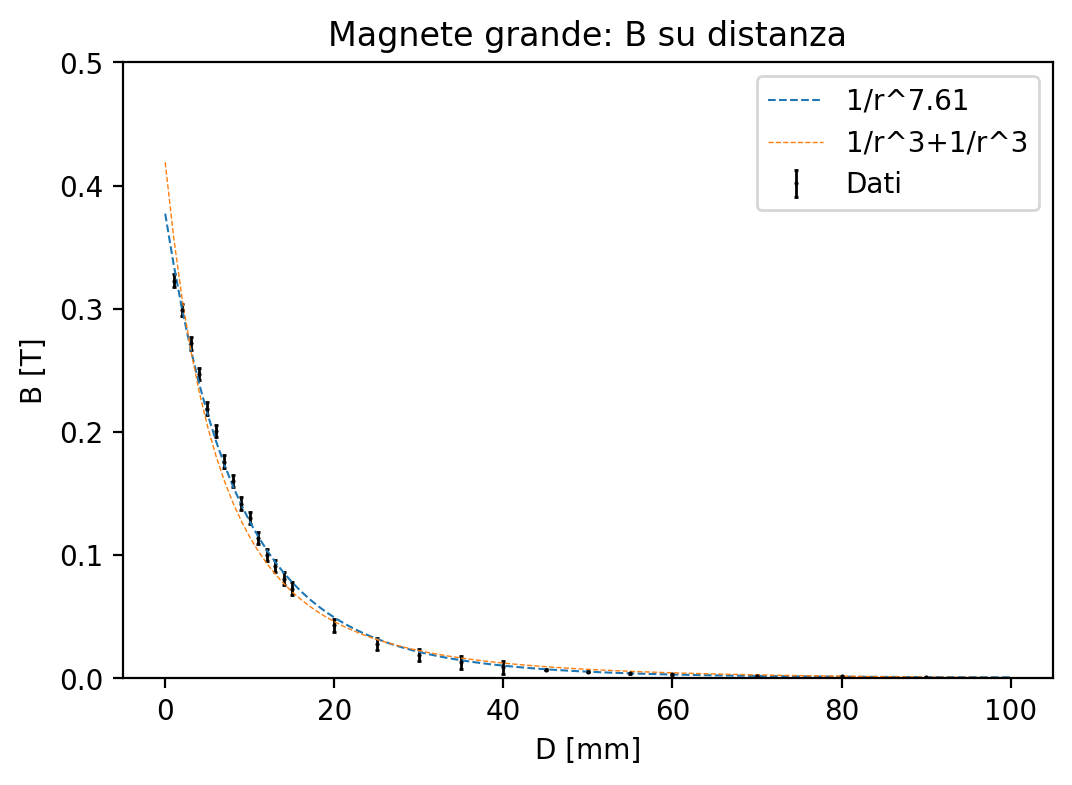

In [94]:
dati2 = np.loadtxt("data/magnete_grande_su_d.csv", skiprows=1)

d2 = dati2[:,1]   # ascissa
B2 = dati2[:,0]   # ordinata
err_B2 = dati2[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d2 = d2[1:]   
B2 = B2[1:]   
err_B2 = err_B2[1:] * 5

low1 = (-np.inf, -np.inf, -0.001)
upp1 = (np.inf, np.inf, 0.001)
low2 = (0, -np.inf, -np.inf, -0.001)
upp2 = (20, np.inf, np.inf, 0.001)
low3 = (-np.inf, -np.inf, -np.inf, -np.inf, -0.001)
upp3 = (np.inf, np.inf, np.inf, np.inf, 0.001)

# FIT #
popt2_1, pcov2_1 = curve_fit(reciproco_cubo, d2, B2, sigma=err_B2, bounds=(low1,upp1))
popt2_2, pcov2_2 = curve_fit(esponente_libero, d2, B2, sigma=err_B2, bounds=(low2,upp2), maxfev=10000)
popt2_3, pcov2_3 = curve_fit(altra, d2, B2, sigma=err_B2, bounds=(low1,upp1), maxfev=10000)
popt2_4, pcov2_4 = curve_fit(due_reciproci_cubi, d2, B2, sigma=err_B2, bounds=(low3,upp3), maxfev=100000)


plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    d2, B2, yerr=err_B2,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
x_fit2 = np.linspace(0, 100, 100)  # Intervallo per il fit
# CUBO
y_fit2_1 = reciproco_cubo(x_fit2, *popt2_1)
etichetta2_1 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
#plt.plot(x_fit2, y_fit2_1, linestyle='--', label='1/r^3', markersize=3, linewidth=0.5)
# ESPONENTE PARAMETRO LIBERO
y_fit2_2 = esponente_libero(x_fit2, *popt2_2)
etichetta2_2 = f"a={popt2_2[0]:.2f}\nΔx={popt2_2[1]:.2f}\nΔy={popt2_2[2]:.2f}"
plt.plot(x_fit2, y_fit2_2, linestyle='--', label=f'1/r^{popt2_2[0]:.2f}', markersize=3, linewidth=0.75)
# ALTRA
y_fit2_3 = altra(x_fit2, *popt2_3)
#plt.plot(x_fit2, y_fit2_3, linestyle='--', label=rf'$B_0$=1/1+(r)^{popt2_3[0]:.2f}', markersize=3, linewidth=0.75)
# DUE RECIPROCI CUBI
y_fit2_4 = due_reciproci_cubi(x_fit2, *popt2_4)
#etichetta2_4 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
plt.plot(x_fit2, y_fit2_4, linestyle='--', label='1/r^3+1/r^3', markersize=3, linewidth=0.5)

plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]") # [T]
plt.ylim(0, 0.5)
plt.title("Magnete grande: B su distanza")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [95]:
chi2_2_1 = chi_quadro(reciproco_cubo, popt2_1, d2, B2, err_B2)
chi2_2_2 = chi_quadro(esponente_libero, popt2_2, d2, B2, err_B2)
chi2_2_4 = chi_quadro(due_reciproci_cubi, popt2_4, d2, B2, err_B2)


print(f"Chi quadro ridotto per 1/r^3: {chi2_2_1:.3f}")
print(f"Chi quadro ridotto per 1/r^{popt2_2[0]:.2f}: {chi2_2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^3+1/r^3: {chi2_2_4:.3f}")


Chi quadro ridotto per 1/r^3: 7.847
Chi quadro ridotto per 1/r^7.61: 0.919
Chi quadro ridotto per 1/r^3+1/r^3: 8.560


# STIMA DI B USANDO f{popt2_2[0]}

In [98]:
# stime numeriche usando la funzione fittata
distanze = range(1,36)
B_da_1_a_35 = [esponente_libero(d, *popt2_2) for d in distanze]
B0 = esponente_libero(0, *popt2_2)

# Calcolo l'errore sui parametri
param_errors = np.sqrt(np.diag(pcov2_2))

# Calcolo l'errore sulle stime
B_da_1_a_35_err = [propagate_error(d, esponente_libero, popt2_2, param_errors) for d in distanze]
B0_err = propagate_error(0, esponente_libero, popt2_2, param_errors)

# Stampo i risultati
print(f" d [mm] |   B [T]   |   σ [T]")
print(f"--------|-----------|----------")
print(f"    0   |  {B0:.5f}  |  {B0_err:.5f}")
for i, d in enumerate(distanze):
    if d < 10:
        print(f"    {d}   |  {B_da_1_a_35[i]:.5f}  |  {B_da_1_a_35_err[i]:.5f}")
    else:
        print(f"   {d}   |  {B_da_1_a_35[i]:.5f}  |  {B_da_1_a_35_err[i]:.5f}")

 d [mm] |   B [T]   |   σ [T]
--------|-----------|----------
    0   |  0.37726  |  0.04260
    1   |  0.33593  |  0.03768
    2   |  0.29965  |  0.03340
    3   |  0.26775  |  0.02966
    4   |  0.23965  |  0.02638
    5   |  0.21485  |  0.02352
    6   |  0.19292  |  0.02100
    7   |  0.17349  |  0.01878
    8   |  0.15626  |  0.01683
    9   |  0.14094  |  0.01510
   10   |  0.12731  |  0.01357
   11   |  0.11515  |  0.01222
   12   |  0.10430  |  0.01102
   13   |  0.09460  |  0.00995
   14   |  0.08591  |  0.00899
   15   |  0.07812  |  0.00814
   16   |  0.07112  |  0.00738
   17   |  0.06483  |  0.00670
   18   |  0.05917  |  0.00609
   19   |  0.05407  |  0.00554
   20   |  0.04946  |  0.00505
   21   |  0.04530  |  0.00461
   22   |  0.04153  |  0.00421
   23   |  0.03812  |  0.00385
   24   |  0.03503  |  0.00352
   25   |  0.03222  |  0.00323
   26   |  0.02967  |  0.00296
   27   |  0.02735  |  0.00272
   28   |  0.02523  |  0.00250
   29   |  0.02331  |  0.00230
   30   

In [97]:
B_da_1_a_35

[np.float64(0.3359262040323032),
 np.float64(0.29965202984474304),
 np.float64(0.26775453427943374),
 np.float64(0.23965254651112525),
 np.float64(0.21484892595504876),
 np.float64(0.19291744780809209),
 np.float64(0.1734918818829208),
 np.float64(0.15625687406112343),
 np.float64(0.1409403134190706),
 np.float64(0.1273069271327408),
 np.float64(0.11515289271394223),
 np.float64(0.10430129536702992),
 np.float64(0.09459828916096079),
 np.float64(0.08590984576362189),
 np.float64(0.07811899484928873),
 np.float64(0.07112347688820893),
 np.float64(0.06483374259192048),
 np.float64(0.05917124440205781),
 np.float64(0.05406697453968244),
 np.float64(0.04946021164948736),
 np.float64(0.04529744427800949),
 np.float64(0.04153144455837988),
 np.float64(0.038120469730824134),
 np.float64(0.03502757266568364),
 np.float64(0.032220005502038275),
 np.float64(0.02966870297410138),
 np.float64(0.027347834054252434),
 np.float64(0.025234412265206636),
 np.float64(0.023307956461189536),
 np.float64(0